# Scraping IMDB's Top 100 Movies using Python


![banner-image](https://scoutlife.org/wp-content/uploads/2011/04/movies-featured.jpg)

# **Summary**

There are certain movies that everyone, even novice filmgoers, will recognize: Stanley Kubrick’s The Shining; David Lean’s Lawrence of Arabia; David Fincher’s Fight Club; Mike Nichols’ The Graduate. Each is lauded by critics, admired by filmmakers, and adored by audiences. And yet none of them made this list.

That’s because the criteria for our list of the 100 Must-Watch Movies to See Before You Die is extremely strict and weighted in historical context. More than a “best movie of all time” list, here are the ones that changed the course of cinema upon their initial release. The ones that inspired or fundamentally altered entire movie genres. Some of these movies are pushing 100 years old, while others were released within the last decade. Regardless, they all hold an important place in the canon of cinema as we know it.

Every self-respecting movie fan owes it to themselves to see each of these at least once before they visit that multiplex concession stand in the sky. Our picks range from horror staples like The Thing to markers of entire eras like The Social Network. So if you’re asking yourself “what should I watch?” this list is perfect for you. We know you’ve got time on your hands – better get started!

![banner-image](https://cbsnews3.cbsistatic.com/hub/i/r/2016/02/27/8997d982-c95c-40bb-94f3-cec6d35d2686/thumbnail/1200x630g2/7365761cb63a90731c436cdb88c66da6/imdb-home-page-promo.jpg)

The IMDB database consists of the entire film library, they have complied a list, there are billions of ratings for the all movies that was ever made.
In this project 

we'll retrive information from multiple pages using web scraping: the process of extracting information from a website in an automated fashion using code. We'll use Python libraries Requests and Beautiful Soup to scarp data from this page. We will then use other libraries like pandas,matplotlib and seaborn to analyse data.

Here's an outline of the steps we'll follow:

- Download the webpage using Requests
- Parse the HTML source code using Beautiful Soup
- Extract property information and complie extracted information into Python lists and dictionaries
- Save the extracted information to CSV file.
- Data analysis using pandas,matplotlib and seaborn
- By the end of the project, we'll create a csv file 

In [40]:
import jovian
import requests
from bs4 import BeautifulSoup
import pandas as pd 
import seaborn as sb
from matplotlib import pyplot as plt

## Fetching two different urls from the same website for scraping the website

In [41]:
URL='https://www.imdb.com/search/title/?groups=top_100&view=simple'

In [42]:
link=URL
link2=URL+'&start=51&ref_=adv_nxt'

In [43]:
imdb_response = requests.get(link)
imdb_response2 = requests.get(link2)

## Copying html for future use 

In [44]:
with open('imdb_response.html', 'w', encoding="utf-8") as file:
    file.write(imdb_response.text)
    
with open('imdb_response2.html', 'w', encoding="utf-8") as file:
    file.write(imdb_response2.text)

## Commonly used methods 

In [45]:
#gets beautiful soup objects 
def getsoupobject(request_response):
    return BeautifulSoup(request_response,'html.parser')

#gets title from beautiful soup objects 
def getname(bae_doc):
    list_head=[]
    headerlist=bae_doc.find_all('img', class_='loadlate')
    for i in headerlist:
        list_head.append(i['alt'])
        
    
    return list_head

#gets rank from beautiful soup objects 
        
def getitemrank(bae_doc):
    list_rank=[]
    ranker=bae_doc.find_all('span', class_='lister-item-index unbold text-primary')
    for i in ranker:
        list_rank.append((i.text).replace(".",""))
    
    
    return list_rank

#gets rating from  beautiful soup objects 

def getrating(bae_doc):
    list_rating=[]
    rater=bae_doc.find_all('div', class_='col-imdb-rating')
    for i in rater:
        value=i.findChildren("strong" , recursive=False)
        value=value[0]
        list_rating.append(value.text.strip())
        
        
    return list_rating


#gets year from beautiful soup objects 
def getitemyear(bae_doc):
    list_year=[]
    year=bae_doc.find_all('span', class_='lister-item-year text-muted unbold')
    for i in year:
        list_year.append((i.text).replace("(I)","").replace(".","").replace("(","").replace(")","").strip())
    
    
    return list_year

In [46]:
doc_imdb1 = getsoupobject(imdb_response.text)
doc_imdb2 =getsoupobject(imdb_response2.text)


## Merging title data below 

Below we merged two different content(Title) scrapped from two different URL's

In [47]:
title1=getname(doc_imdb1)
title2=getname(doc_imdb2)
title=title1+title2


## Merging Rank data below 

Below we merged two different content(Rank) scrapped from two different URL's

In [48]:
rank1=getitemrank(doc_imdb1)
rank2=getitemrank(doc_imdb2)
rank=rank1+rank2


## Merging Rating data below 

Below we merged two different content(Rating) scrapped from two different URL's

In [49]:
rating1=getrating(doc_imdb1)
rating2=getrating(doc_imdb2)
rating=rating1+rating2


## Merging Year data below 

Below we merged two different content(Year) scrapped from two different URL's

In [50]:
year1=getitemyear(doc_imdb1)
year2=getitemyear(doc_imdb2)
year=year1+year2


 we received title of the movie, rank of the movie , rating of the movie and year of release

## Converting the above lists into a dict to make them to a CSV 

In [51]:

finallist = pd.DataFrame(
    {'Ranking': rank,
     'Title': title,
     'Year': year,
     'Rating': rating,
    })

In [52]:
finallist=finallist.set_index('Ranking')

In [53]:
finallist

,Title,Year,Rating
Ranking,,,
1,Everything Everywhere All at Once,2022,8.8
2,The Godfather,1972,9.2
3,Avengers: Endgame,2019,8.4
4,The Dark Knight,2008,9
5,The Shawshank Redemption,1994,9.3
...,...,...,...
96,Witness for the Prosecution,1957,8.4
97,Modern Times,1936,8.5
98,The Great Dictator,1940,8.4


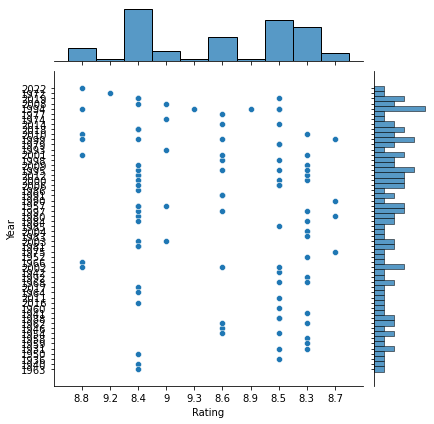

In [54]:
sb.jointplot(x = "Rating", y = "Year", data = finallist)
plt.show()


The above figure points to the the year wise data with the number of movies release along with the user rating of those movies

## Final csv generated below 

In [55]:
finallist.to_csv('test.csv')


In [56]:
# Execute this to save new versions of the notebook
jovian.commit(project="project-mark1-topmovies")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "krishna-avadhanam1/project-mark1-topmovies" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/krishna-avadhanam1/project-mark1-topmovies


'https://jovian.ai/krishna-avadhanam1/project-mark1-topmovies'

In [57]:
jovian.commit(files = ['test.csv'])

<IPython.core.display.Javascript object>

[jovian] Updating notebook "krishna-avadhanam1/project-mark1-topmovies" on https://jovian.ai
[jovian] Uploading additional files...
[jovian] Committed successfully! https://jovian.ai/krishna-avadhanam1/project-mark1-topmovies


'https://jovian.ai/krishna-avadhanam1/project-mark1-topmovies'